<a href="https://colab.research.google.com/github/ihyaulumuddin044/machineLearning/blob/main/tugas_klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#liat data

In [32]:
df = pd.read_csv('hasil_clustering.csv')
df.head()

,provinsi,jenis,daerah,tahun,periode,gk,ump,peng,upah,cluster
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0,1900000.0,466355.0,11226.0,1
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0,1900000.0,466355.0,11226.0,1
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0,2118500.0,548853.0,13627.0,1
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0,2118500.0,548853.0,13627.0,1
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0,1900000.0,395136.0,11226.0,0


In [33]:
df.shape

(2176, 10)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  2176 non-null   object 
 1   jenis     2176 non-null   object 
 2   daerah    2176 non-null   object 
 3   tahun     2176 non-null   int64  
 4   periode   2176 non-null   object 
 5   gk        2144 non-null   float64
 6   ump       2176 non-null   float64
 7   peng      2144 non-null   float64
 8   upah      2176 non-null   float64
 9   cluster   2176 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 170.1+ KB


In [35]:
df.dropna(inplace=True)

print(f'jumlah data yang hilang: \n{df.isnull().sum()}')

jumlah data yang hilang: 
provinsi    0
jenis       0
daerah      0
tahun       0
periode     0
gk          0
ump         0
peng        0
upah        0
cluster     0
dtype: int64


In [37]:
from sklearn.preprocessing import MinMaxScaler
numeric_columns = df.select_dtypes(np.number).columns[1:4]

scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df.head()

,provinsi,jenis,daerah,tahun,periode,gk,ump,peng,upah,cluster
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,0.413212,0.265284,0.207971,11226.0,1
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,0.427424,0.265284,0.207971,11226.0,1
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,0.434360,0.323834,0.267067,13627.0,1
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,0.457159,0.323834,0.267067,13627.0,1
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,0.419587,0.265284,0.156954,11226.0,0


In [38]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop="first")

target = ["jenis", "daerah"]
encoded = encoder.fit_transform(df[target])
column_names = [str.lower(i) for i in [*encoder.get_feature_names_out()]]

df[column_names] = encoded
column_index = df.columns.get_indexer(column_names)
df.insert(column_index[-1], "cluster", df.pop("cluster"))

df.head()

,provinsi,jenis,daerah,tahun,periode,gk,ump,peng,upah,jenis_nonmakanan,daerah_perkotaan,cluster
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,0.413212,0.265284,0.207971,11226.0,0.0,1.0,1
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,0.427424,0.265284,0.207971,11226.0,0.0,1.0,1
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,0.434360,0.323834,0.267067,13627.0,0.0,1.0,1
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,0.457159,0.323834,0.267067,13627.0,0.0,1.0,1
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,0.419587,0.265284,0.156954,11226.0,0.0,0.0,0


In [39]:
df.drop(columns=["provinsi", "jenis", "daerah", "tahun", "periode"], inplace=True)

#model

In [41]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["cluster"])
y = df["cluster"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
print(f'training set: X {X_train.shape}, y{y_train.shape}')
print(f'test set: X {X_test.shape}, y {y_test.shape}')

training set: X (1715, 6), y(1715,)
test set: X (429, 6), y (429,)


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Akurasi: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       102
           3       1.00      1.00      1.00       127

    accuracy                           1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429

Confusion Matrix:
[[101   0   0   0]
 [  0  99   0   0]
 [  0   0 102   0]
 [  0   0   0 127]]


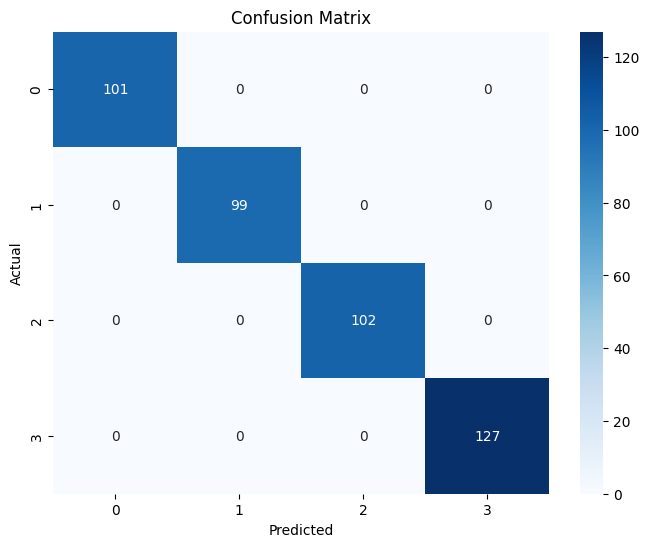

In [47]:
# prompt: evaluasi model

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = rf_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")

print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Akurasi Decision Tree: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       102
           3       1.00      1.00      1.00       127

    accuracy                           1.00       429
   macro avg       1.00      1.00      1.00       429
weighted avg       1.00      1.00      1.00       429

Confusion Matrix Decision Tree:
[[101   0   0   0]
 [  0  99   0   0]
 [  0   0 102   0]
 [  0   0   0 127]]


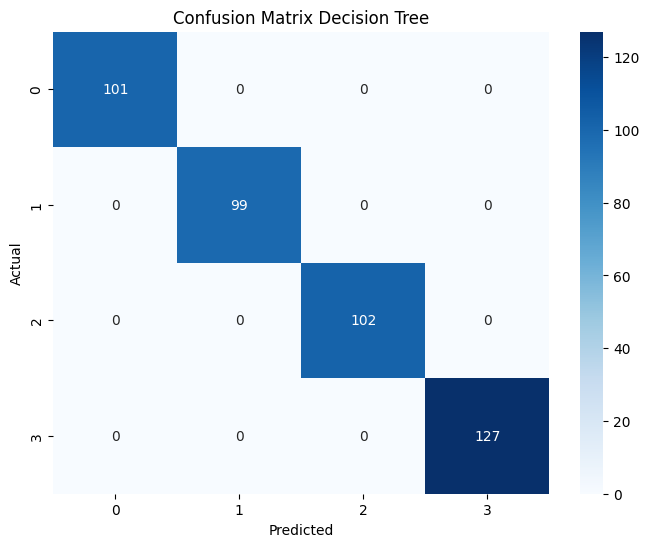

In [51]:
# prompt: klasifikasi dengan Decision Tree

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Inisialisasi model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

# Latih model
dt_model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred_dt = dt_model.predict(X_test)

# Evaluasi model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Akurasi Decision Tree: {accuracy_dt}")

print(classification_report(y_test, y_pred_dt))

# Confusion Matrix untuk Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix Decision Tree:")
print(cm_dt)

# Plot confusion matrix (opsional)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Decision Tree")
plt.show()
